<a href="https://colab.research.google.com/github/BlueveryPi/AI_Practice/blob/main/%EC%A6%90%EA%B1%B0%EC%9A%B4_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.random.set_seed(777)

import numpy as np
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test)=load_data(path="mmist.npz")
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train, test_size=0.3, random_state=777)

num_x_train=x_train.shape[0]
num_x_val=x_val.shape[0]
num_x_test=x_test.shape[0]

x_train=(x_train.reshape((num_x_train, 28*28)))/255
x_val=(x_val.reshape((num_x_val, 28*28)))/255
x_test=(x_test.reshape((num_x_test, 28*28)))/255

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

model=Sequential()
model.add(Dense(64, activation="relu", input_shape=(784, )))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

history=model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

model.evaluate(x_test, y_test)
result=model.predict(x_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.9037 - acc: 0.7209 - val_loss: 0.2538 - val_acc: 0.9278
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2275 - acc: 0.9341 - val_loss: 0.1854 - val_acc: 0.9469
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1633 - acc: 0.9522 - val_loss: 0.1609 - val_acc: 0.9536
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1300 - acc: 0.9612 - val_loss: 0.1350 - val_acc: 0.9599
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1050 - acc: 0.9690 - val_loss: 0.1265 - val_acc: 0.9626
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0903 - acc: 0.9735 - val_loss: 0.1185 - val_acc: 0.9654
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0737 - acc: 0.9779 - val_loss: 0.1135 - val_acc: 0.9653
Epoch 8/30


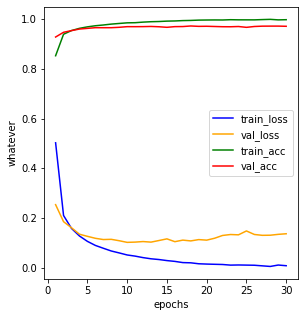

In [ ]:
import matplotlib.pyplot as plt

history_dict=history.history
acc=history_dict["acc"]
loss=history_dict["loss"]
val_acc=history_dict["val_acc"]
val_loss=history_dict["val_loss"]

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(10,5))

ax1=fig.add_subplot(1, 2,1)
ax1.plot(epochs, loss, color="blue", label="train_loss")
ax1.plot(epochs, val_loss, color="orange", label="val_loss")
ax1.plot(epochs, acc, color="green", label="train_acc")
ax1.plot(epochs, val_acc, color="red", label="val_acc")
ax1.set_xlabel("epochs")
ax1.set_ylabel("whatever")
ax1.legend()

plt.show()

(10000, 10)
0:  0%
1:  0%
2:  0%
3:  0%
4:  0%
5:  0%
6:  99%
7:  0%
8:  0%
9:  0%


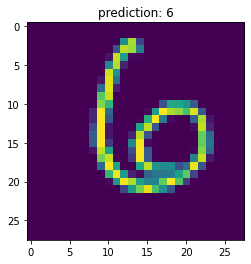

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

test=100

results=model.predict(x_test)
print(result.shape)
np.set_printoptions(precision=test)
indx=0
for p in results[test]:
    print(str(indx)+":  "+str(int(float(p)*100))+"%")
    indx+=1

arg_results=np.argmax(results, axis=-1)
plt.imshow(x_test[test].reshape(28, 28))
plt.title("prediction: "+str(arg_results[test]))
plt.show()

Q-Learning 가즈아ㅏㅏㅏㅏㅏㅏㅏㅏㅏㅏ

In [ ]:
import gym

env=gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
state=env.encode(1, 2, 3, 2)
print("state:", state)
env.s=state
env.render()
env.P[state]

state: 154
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



{0: [(1.0, 254, -1, False)],
 1: [(1.0, 54, -1, False)],
 2: [(1.0, 174, -1, False)],
 3: [(1.0, 154, -1, False)],
 4: [(1.0, 154, -10, False)],
 5: [(1.0, 154, -10, False)]}

Q-table 초기화

In [ ]:
import numpy as np
q_table=np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
import random
from IPython.display import clear_output

#Hyperparameters
alpha=0.1 #learning rate(배움 척도쯤 되겠당)
gamma=0.6 #discount factor(장기적인 계획을 세우는 정도)
epsilon=0.1 #호기심 척도

#for plottings
all_epochs=[]
all_penalties=[]
frames=[]

#actually doing it
for i in range(1, 100001):
    #reset
    state=env.reset()
    epochs=0
    penalties=0      #한글이랑 영어를 섞어서 쓴 이유: 한/영키 치기 귀찮아서
    reward=0
    done=False

    while not done:
        if random.uniform(0, 1)<epsilon: #0과 1 사이의 실수 리턴, 즉 랜덤으로 어떤 행동을 할지 결정 
            action=env.action_space.sample() #choose a random action
        else:
            action=np.argmax(q_table[state]) #do what's in the q_table
        
        next_state, reward, done, info=env.step(action) #do the action

        old_value=q_table[state, action] #what it was supposed to do according to the q_table
        next_max=np.max(q_table[next_state]) #most suitable thing to do next according to the q_table

        new_value=(1-alpha)*old_value+alpha*(reward+gamma*next_max) #probably somthing like bellman equation
        q_table[state, action]=new_value #updating the q_table

        if reward==-10:
            penalties+=1 #give penalties

        state=next_state
        epochs +=1

    if i%100==0:
        clear_output(wait=True)
        print("*simpsons opening song* episode: "+str(i))

print("whew... it was hard")


*simpsons opening song* episode: 100000
whew... it was hard


와 진짜 오래걸리네        
언제되냐...        
이제 6000이네...       
자야되는데...       
2021_02_10 22:09 이제 9000대다..!      
아씨 10000인줄 알았는데 100000이었어      
켜두고 잘까     
잘준비부터 해야지...       
양치질 하는중    
칰카치카    
애니메이션 보여주는 걸로 뭐하는지 볼 수 ㅇ;ㅆ지 않을까     
일단 한바퀴마다 env,render()를 넣긴 했는데 실행중이라 다시 실헹을 못함..     
걍 5만인데 다시 해야징     
조아 트레이닝 재개해따   
우와 다대따

In [ ]:
from IPython.display import clear_output
from time import sleep
from random import randint

while True:
    env.reset()
    done=False
    while not done:
        action=np.argmax(q_table[state])
        next_state, reward, done, info=env.step(action)
        state=next_state
        clear_output(wait=True)
        print(state)
        env.render()
        sleep(0.3)
    print("another taxiwork done.")
    sleep(0.7)

353
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


KeyboardInterrupt: ignored

In [ ]:
env.s=randint(0, 300)
env.render()
print(state)

+---------+
|R: | : :G|
| : | : :_|
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
353


이건 왜 안됨...?

In [ ]:
import gym

env=gym.make("Breakout-v4").env
print(env.step(env.action_space))

TypeError: ignored

이미지 API 함 써보즈아(안됨)

In [ ]:
import urllib2
import simplejson
import cStringIO

fetcher = urllib2.build_opener()
searchTerm = 'parrot'
startIndex = 0
searchUrl = "http://ajax.googleapis.com/ajax/services/search/images?v=1.0&q=" + searchTerm + "&start=" + startIndex
f = fetcher.open(searchUrl)
deserialized_output = simplejson.load(f)

imageUrl = deserialized_output['responseData']['results'][0]['unescapedUrl']
file = cStringIO.StringIO(urllib.urlopen(imageUrl).read())
img = Image.open(file)

ModuleNotFoundError: ignored